In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data_df = pd.read_csv('VehicleData-1.csv')
data_df['DATE'] = pd.to_datetime(data_df['DATE'], format='%m/%d/%y')

display(data_df.head())

,DATE,Total Sales,New Orders
0,2000-01-01,18.635,43668
1,2000-02-01,19.401,39808
2,2000-03-01,18.343,40749
3,2000-04-01,17.939,40644
4,2000-05-01,17.943,38730


In [16]:
display(data_df.head())
print(data_df.columns)

,DATE,Total Sales,New Orders
0,2000-01-01,18.635,43668
1,2000-02-01,19.401,39808
2,2000-03-01,18.343,40749
3,2000-04-01,17.939,40644
4,2000-05-01,17.943,38730


Index(['DATE', 'Total Sales ', 'New Orders'], dtype='object')


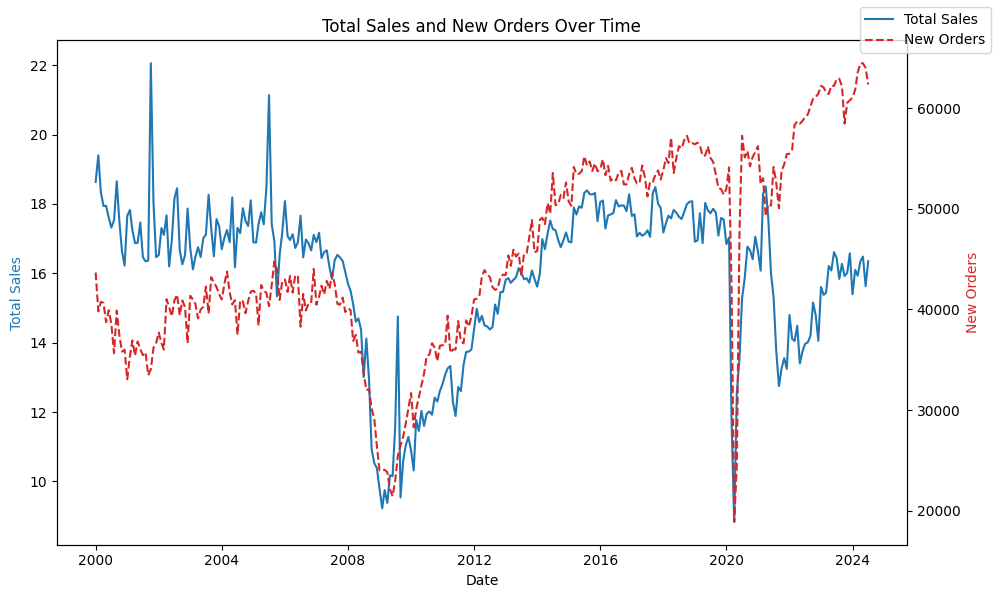

In [23]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# --- Left Y-axis (Total Sales) ---
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Sales', color=color)
ax1.plot(data_df['DATE'], data_df['Total Sales '], color=color, label='Total Sales')


# --- Right Y-axis (New Orders) ---
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('New Orders', color=color)
ax2.plot(data_df['DATE'], data_df['New Orders'], color=color, linestyle='--', label='New Orders')


plt.title('Total Sales and New Orders Over Time')
fig.tight_layout()
fig.legend()
plt.show()


Additional Data


Processing: Additional Data\Auto Inventory Sales Ratio - SA.csv


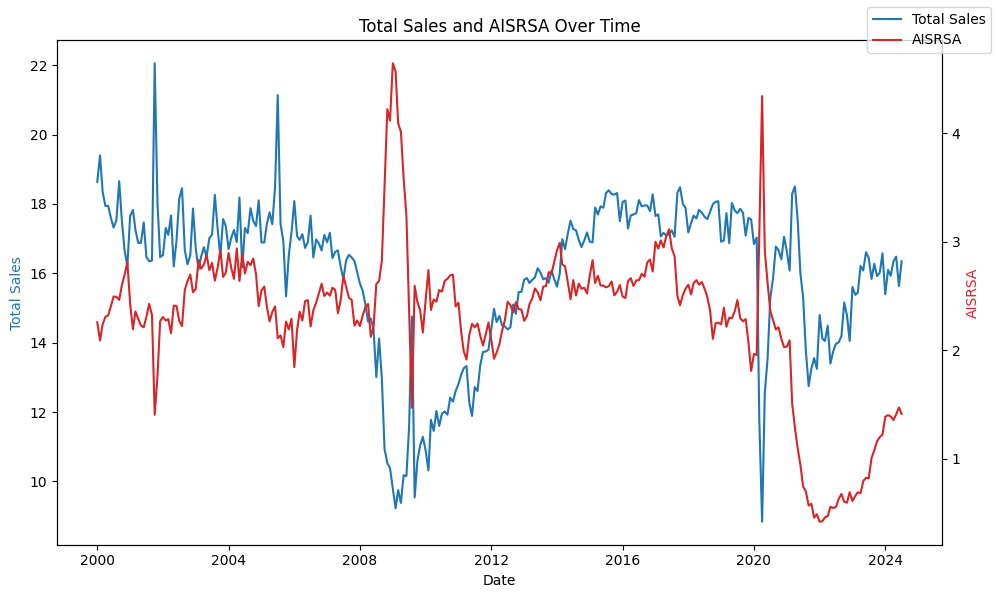

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import glob


folder_path = "Additional Data/*.csv"


def determine_date_col(columns):
    date_col = None
    for col in columns:
        # Common date-like column names
        if 'date' in col.lower() or 'time' in col.lower() or 'day' in col.lower():
            date_col = col
            break

    # If not found, try to infer a datetime-like column
    if date_col is None:
        for col in columns:
            try:
                # Try to parse first few entries
                pd.to_datetime(df[col].head(5))
                date_col = col
                break
            except Exception:
                continue
    return date_col
# Loop through each CSV file
for file_path in glob.glob(folder_path)[:1]:
    print(f"\nProcessing: {file_path}")
    
    # Read the file (change to read_excel() if needed)
    df = pd.read_csv(file_path)
    
    # --- Step 1: Detect the DATE column ---
    date_col = determine_date_col(df.columns)

    if date_col is None:
        print("❌ No date-like column found — skipping.")
        continue

    # --- Step 2: Detect the quantity/value column ---
    quantity_col = None
    for col in df.columns:
        if col != date_col and df[col].dtype in ['int64', 'float64']:
            quantity_col = col
            break

    if quantity_col is None:
        print("❌ No numeric column found — skipping.")
        continue

    # --- Step 3: Convert DATE column to datetime ---
    try:
        df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    except Exception:
        for fmt in ['%m/%d/%y', '%Y-%m-%d', '%d/%m/%Y']:
            try:
                df[date_col] = pd.to_datetime(df[date_col], format=fmt)
                break
            except Exception:
                continue

    # --- Step 4: Sort by date (good practice) ---
    df = df.sort_values(by=date_col)
    df = df[(df[date_col] >= data_df['DATE'].min()) & (df[date_col] <= data_df['DATE'].max())]

    fig, ax1 = plt.subplots(figsize=(10, 6))   
    # --- Left Y-axis (Total Sales) ---
    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Total Sales', color=color)
    ax1.plot(data_df['DATE'], data_df['Total Sales '], color=color, label='Total Sales')


    # --- Right Y-axis (New Orders) ---
    ax2 = ax1.twinx()  
    color = 'tab:red'
    ax2.set_ylabel(quantity_col, color=color)
    ax2.plot(df[date_col], df[quantity_col], color =color,  label=quantity_col)
    plt.title(f'Total Sales and {quantity_col} Over Time')
    fig.tight_layout()
    fig.legend()
    plt.show()
